# Exercise - Hadamard matrix multiplication timing!

In this exercise we are going to use the OpenCL profiling library to time the kernel execution for the Hadamard multiplication problem, where the values in matrices **D** and **E** at coordinates (i0,i1) are multiplied together to set the value at coordinates (i0,i1) in matrix **F**.

<figure style="margin-left:auto; margin-right:auto; width:80%;">
    <img style="vertical-align:middle" src="../images/elementwise_multiplication.svg">
    <figcaption style= "text-align:lower; margin:1em; float:bottom; vertical-align:bottom;">Elementwise multiplication of matrices D and E to get F.</figcaption>
</figure>

The source code is located in [mat_elementwise.cpp](mat_elementwise.cpp) and the kernel is in [kernels_elementwise.c](kernels_elementwise.c). Matrices **D** and **E** are read in from disk and matrix **F** is produced as the output. Your task is to measure how long it takes to execute the kernel using the OpenCL profiling interface.

## Constructing the inputs and solution

As before, we construct input matrices and call them **D** and **E**.

In [1]:
import os
import sys
import numpy as np
sys.path.insert(0, os.path.abspath("../include"))

import py_helper

%matplotlib widget

# Matrices D, E, F are of size (NROWS_F, NCOLS_F)
NROWS_F = 520
NCOLS_F = 1032

# Data type
dtype = np.float32

mat_mul=py_helper.Hadamard(NROWS_F, NCOLS_F, dtype)
mat_mul.make_data()

## Run the code

In [6]:
!make; ./mat_elementwise.exe

make: Nothing to be done for 'all'.
	               name: Intel(R) FPGA Emulation Device 
	 global memory size: 135049 MB
	    max buffer size: 33762 MB
	     max local size: (67108864,67108864,67108864)
	     max work-items: 67108864


As you can see, there currently is no output to tell how long the kernel ran for.

## Check the output

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
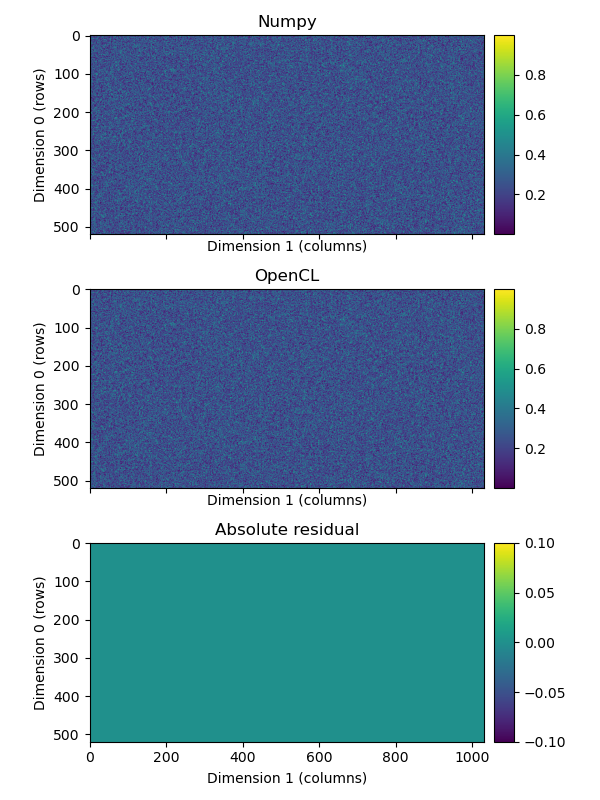

In [3]:
mat_mul.check_data()

## Tasks

Your task is to time the kernel execution using OpenCL events and the the command queue functionality to profile events.

* Modify the options to the helper function **h_create_command_queues** to enable profiling
* Call the helper function **h_get_event_time_ms** to print out the kernel execution time (in milliseconds).

### Bonus task

* Use the helper function **h_get_event_time_ms** to measure the time and IO rate of the uploads and downloads to the compute device.

### Answers

You can of course always look at the answer, in [mat_elementwise.cpp](mat_elementwise_answers.cpp) and run the answer below.

In [4]:
!make; ./mat_elementwise_answers.exe

make: Nothing to be done for 'all'.
	               name: Intel(R) FPGA Emulation Device 
	 global memory size: 135049 MB
	    max buffer size: 33762 MB
	     max local size: (67108864,67108864,67108864)
	     max work-items: 67108864
Time for event "Uploading Buffer D": 0.384 ms (5587.57 MB/s)
Time for event "Uploading Buffer E": 0.352 ms (6105.57 MB/s)
Time for event "Kernel execution": 1.877 ms
Time for event "Downloading Buffer F": 0.352 ms (6105.57 MB/s)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
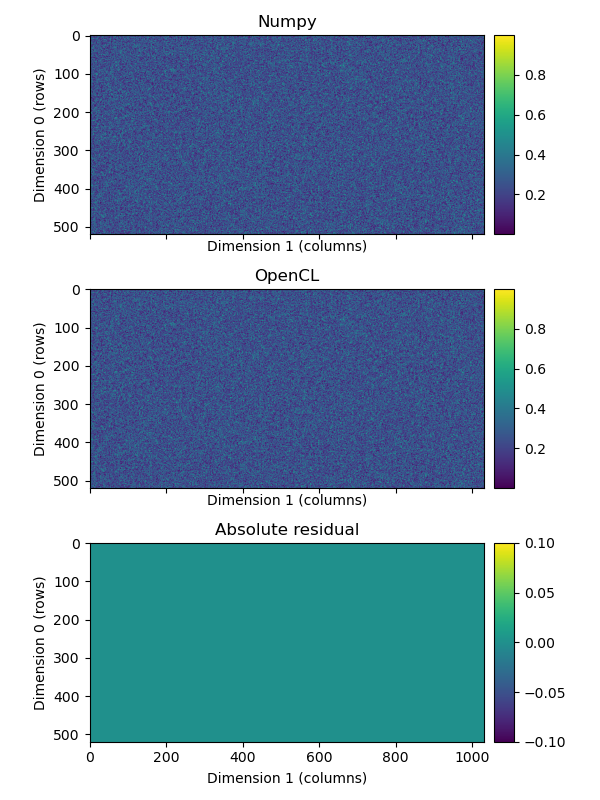

In [5]:
mat_mul.check_data()

<address>
Written by Dr. Toby Potter of <a href="https://www.pelagos-consulting.com">Pelagos Consulting and Education</a> for the Pawsey Supercomputing Centre
</address>